<h2>Bike Demand Sharing Analysis using Linear Regression Hybrid approach (RFE & Manual)</h2>

<img style="text-align:start;" src="https://static.wixstatic.com/media/1a7d78_77851008cda84fa99b8dcb7013ea9d3d~mv2.jpg/v1/fill/w_640,h_360,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/1a7d78_77851008cda84fa99b8dcb7013ea9d3d~mv2.jpg"/>

## Table of Contents <a name="content0"/>
1. [Import required libraries](#content1)
2. [Data Sourcing & Understanding](#content2)
3. [Data Cleaning](#content3)
4. [Univariate Analysis](#content4)
<br/>    4.1 [Univariate Analysis on numeric](#content4_1)
<br/>    4.2 [Univariate Analysis on categorical](#content4_2)
5. [Bivariate Analysis](#content5)
6. [Data Preperation](#content6)
<br/>    6.1 [Dummy Variables](#content6_1)
<br/>    6.2 [Splitting the Data into Train and Test Sets](#content6_2)
<br/>    6.3 [Feature Scaling](#content6_3)
<br/>    6.4 [Dividing into X and Y sets for the model building](#content6_4)
7. [Data Modelling](#content7)
<br/>    7.1 [Recusive feature elemination (RFE)](#content7_1)
<br/>    7.2 [Building model  with Manual approach using statsmodel, for the detailed statistics](#content7_2)
<br/>    7.3 [Residual Analysis of the train data](#content7_3)
8. [Model Prediction & Evaluation](#content8)
9. [Conclusion](#content9)

## 1. Import required libraries <a name="content1"/>

In [96]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

# Supress Warnings## 1. Import necessary libraries & Set required parameters <a name="content1"/>
import warnings
import calendar
from datetime import date


warnings.filterwarnings('ignore')

[Back To Top🔝](#content0)
## 2. Data Sourcing & Understanding<a name="content2"/>

In [97]:
#read the dataset
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [98]:
df.shape

(730, 16)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>There are no null values in the columns and all the varibles have numerical values except 'dteday' which has type object</p>
</div>

In [100]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


[Back To Top🔝](#content0)
## 3. Data Cleaning <a name="content3"/>

Note: We have already confirmed from `df.info()` that there are no null values

### Check duplicates in data

In [101]:
#check duplicates in data
df.duplicated().sum()

0

### Dropping the columns which are not needed

We have following columns which are irrelevant to data:
 1. `instant` column is a record index which does not have any impact on target variable `cnt`. So, we will drop this column
 2. We already have columns which has useful information from `dteday` object. So, we will drop this column
 3. `casual` and `registered` are summed up to get `cnt` which is the target variable. So, we will drop these columns.

In [102]:
# dropping the columns which are not needed
df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Change categorical variables from numeric to categorical type


1. We have following categorical variables which are in numeric type. So we need to change them back to categorical type<br/>
        1. `season`     - has 4 values  (1:spring, 2:summer, 3:fall, 4:winter) <br/>
        2. `mnth`       - has 12 values (1: Jan, 2:Feb, ... , 12: Dec) <br/>
        3. `weekday`    - has 7 values  (0: Sunday, 1: Monday, ... , 6: Saturday) <br/>
        4. `weathersit` - has 4 values  (1: Clear, 2: Mist, 3: Light Snow and Rain, 4: Heavy Rain) <br/><br/>
2. We have following categorical variables which are in binary type. So we <b>need not</b> change them back to categorical type<br/>
        1. `yr`             - year (0: 2018, 1:2019) <br/>
        2. `holiday`        - holiday or not (0: no, 1: yes) <br/>
        3. `workingday`     - if day is neither weekend nor holiday is 1, otherwise is 0 <br/>

In [103]:
#change season to categorical
df["season"] = df["season"].apply(lambda x: "spring" if x==1 else ("summer" if x==2 else ("fall" if x==3 else "winter")))
df["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [104]:
#change mnth to categorical
df["mnth"] = df["mnth"].apply(lambda x: calendar.month_abbr[x])
df["mnth"].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [105]:
#change weekday to categorical
df["weekday"] = df["weekday"].apply(lambda x: calendar.day_name[x])
df["weekday"].value_counts()

Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: weekday, dtype: int64

In [106]:
#change weathersit to categorical
weathersit_map = {1:"Clear", 2:"Mist", 3:"Light Snow and Rain", 4:"Heavy Rain"}
df["weathersit"] = df["weathersit"].apply(lambda x: weathersit_map[x])
df["weathersit"].value_counts()

Clear                  463
Mist                   246
Light Snow and Rain     21
Name: weathersit, dtype: int64

[Back To Top🔝](#content0)
## 4. Univariate Analysis <a name="content4"/>

<Axes: ylabel='cnt'>

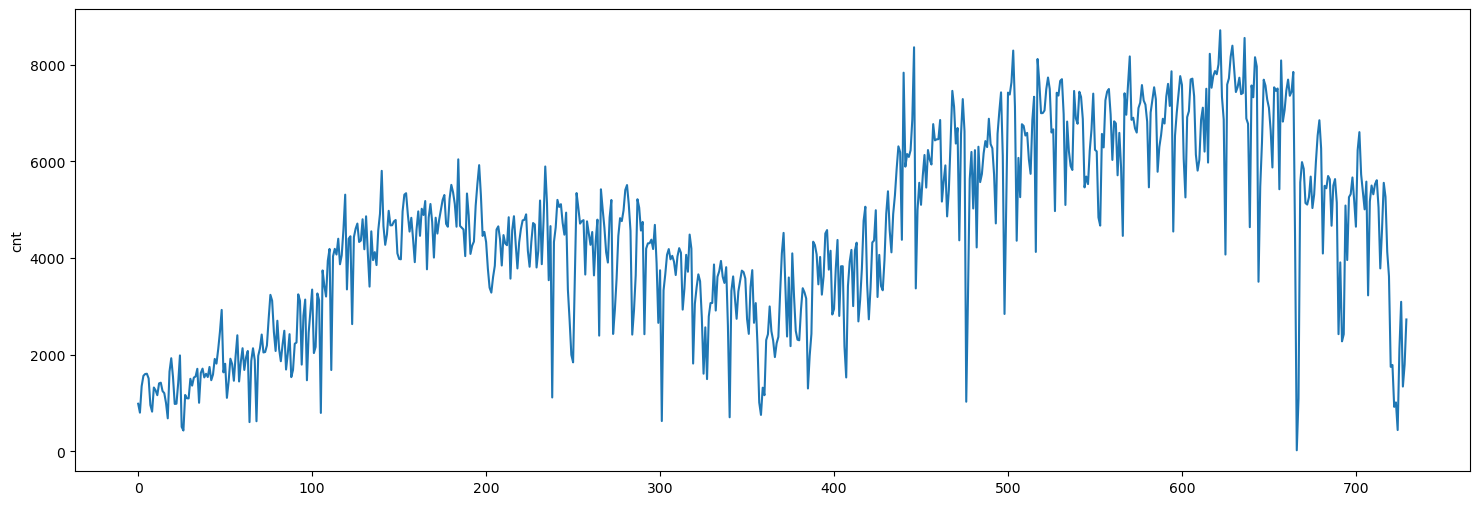

In [107]:
#univariate on target variable 'cnt'
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=df['cnt'])

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>There was a growth previously over a period but recently we can see that there is a huge drop in bike demands</p>
</div>

In [108]:
#func to plot data in EDA
def plot_data(title, cols, plot_type):
    df_piplot = df[cols]
    plt.figure(figsize=(18,16))
    plt.suptitle(title, fontsize=20)
    for i in range(1,df_piplot.shape[1]+1):
        plt.subplot(3,3,i)
        f=plt.gca()
        f.set_title(df_piplot.columns.values[i-1])
        values=df_piplot.iloc[:,i-1].value_counts(normalize=True).values
        index=df_piplot.iloc[:,i-1].value_counts(normalize=True).index
        match plot_type:
            case "bar":
                sns.barplot(data = df, y='cnt', x=cols[i-1])
            case "pie":
                plt.pie(values,labels=index,autopct='%1.0f%%')
            case default:
                sns.boxplot(data = df[cols[i-1]])
    plt.show()

[Back To Top🔝](#content0)
### 4.1 Univariate Analysis on numeric<a name="content4_1"/>

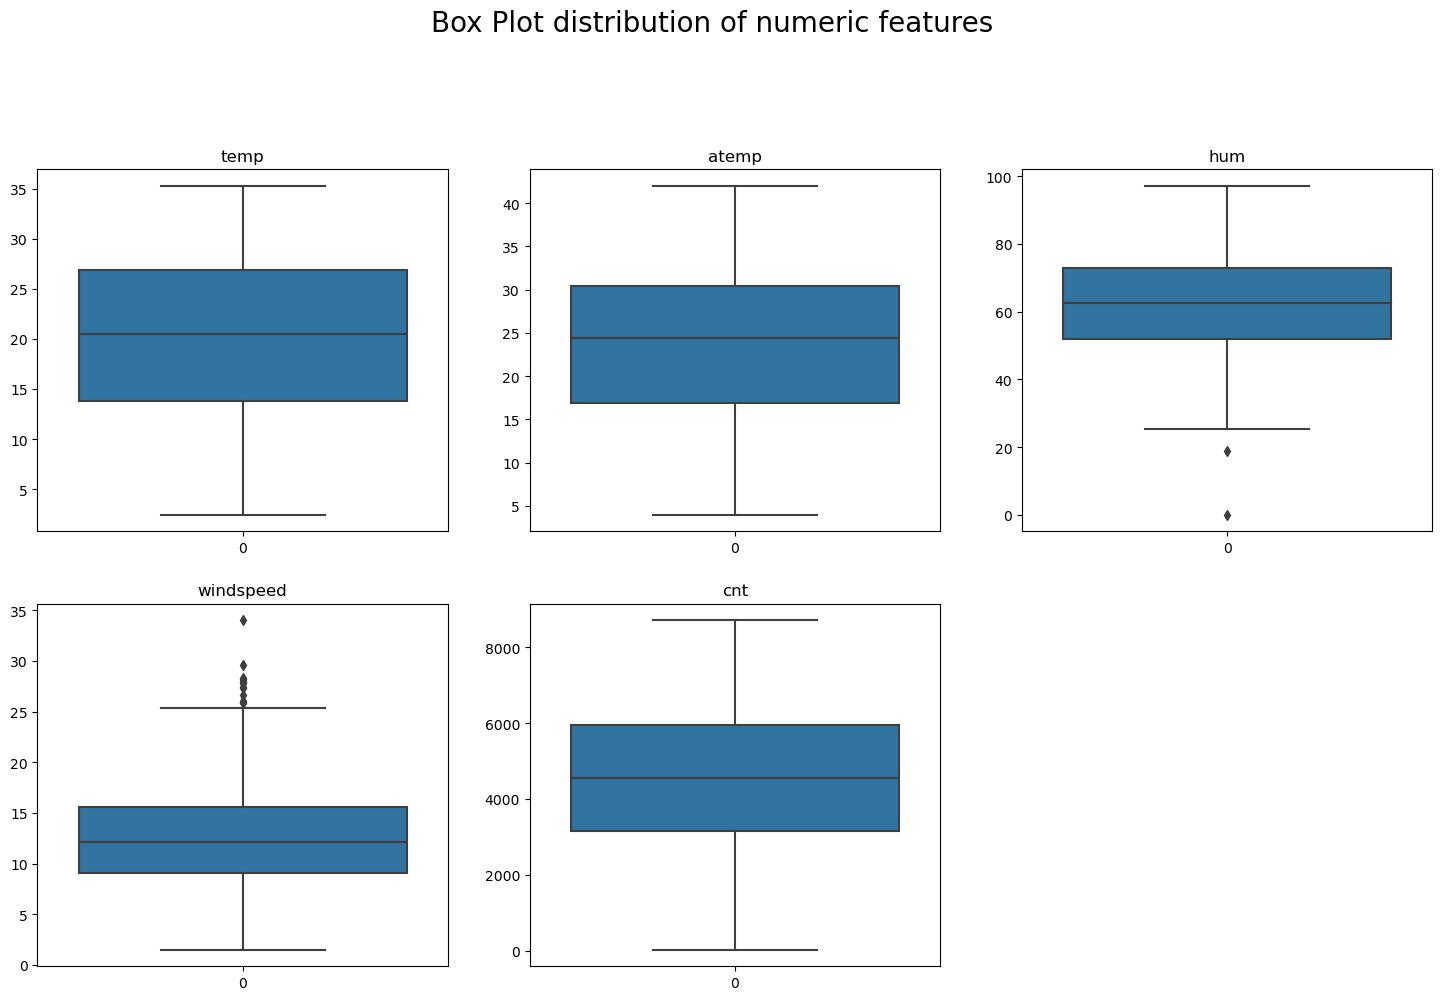

In [109]:
#univariate on all continous variables
numeric_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plot_data('Box Plot distribution of numeric features', numeric_col, 'box')

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>From the above plots it could be observed that hum and windspeed are having few outliers.</p>
</div>

In [110]:
# get percentage outlier for hum and windspeed

# function to get outlier percentage
def outlier_percentage(x):
    iqr = df[x].quantile(0.75)-df[x].quantile(0.25)
    HL = df[x].quantile(0.75)+iqr*1.5
    LL = df[x].quantile(0.25)-iqr*1.5
    outlier_per = ((df[x]<LL).sum()+(df[x]>HL).sum())/len(df[x])*100
    outlier_per = round(outlier_per,2)
    return(outlier_per)

print('Percentage of outlier (hum): ', outlier_percentage('hum'))
print('Percentage of outlier (windspeed): ', outlier_percentage('windspeed'))

Percentage of outlier (hum):  0.27
Percentage of outlier (windspeed):  1.78


<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Percentage of outlier for hum and windspeed are 0.27 and 1.78 respectively.<br/>
As these percentage is low, and we can see there is no significant abnormal outlier value. So we will leave it as it is.</p>
</div>

[Back To Top🔝](#content0)
### 4.2 Univariate Analysis on categorical<a name="content4_2"/>

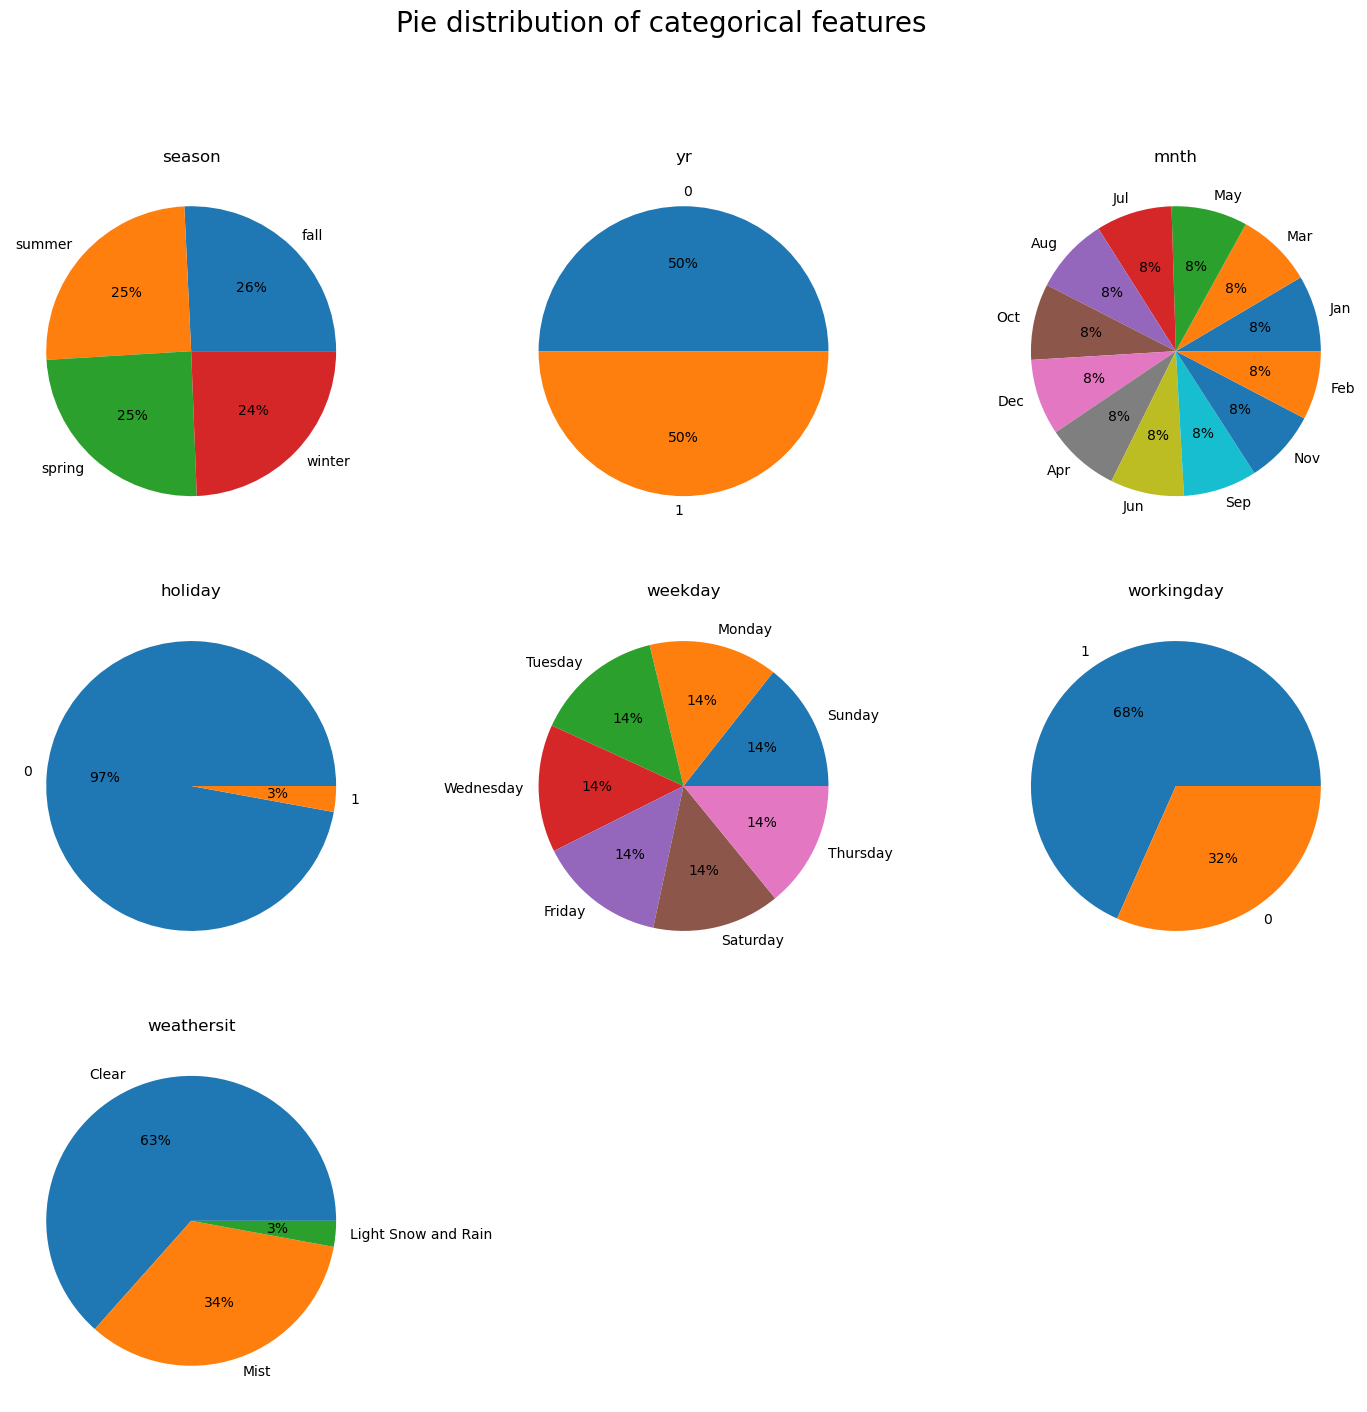

In [111]:
#univariate on all categorical variables with pie plot
categorical_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plot_data('Pie distribution of categorical features', categorical_col, 'pie')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p>Insights:<br/><br/>
        <section> Season: 
            <ul> 
                <li>We could see that the BoomBikes was operating similar days in all four seasons.</li>
            </ul>
        </section>
        <section> Year: 
            <ul> 
                <li>Number of BoomBikes operation days in both the year are almost same.</li>
            </ul>
        </section>
        <section> Month: 
            <ul> 
                <li>We could see that the BoomBikes was operating similar days in all 12 months.</li>
            </ul>
        </section>
        <section> Holiday: 
            <ul> 
                <li>BoomBikes was working in 3% days of holiday</li>
            </ul>
        </section>
        <section> Weekdays: 
            <ul> 
                <li>We could see that the BoomBikes was working in similar percentage in all weekdays.</li>
            </ul>
        </section>
        <section> Workingday: 
            <ul> 
                <li>BoomBikes was operating in 68% in workign days and 32% in nonworking days.</li>
            </ul>
        </section>
        <section> Weathersit: 
            <ul> 
                <li>From the above analaysis it is being observed that there is no data for 4th category of weathersit i.e Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.</li>
                <li>May be the company is not working on those days or there was no demand of bike.</li>
            </ul>
        </section></p>
</div>

[Back To Top🔝](#content0)
### 5. Bivariate Analysis<a name="content5"/>

<Figure size 800x400 with 0 Axes>

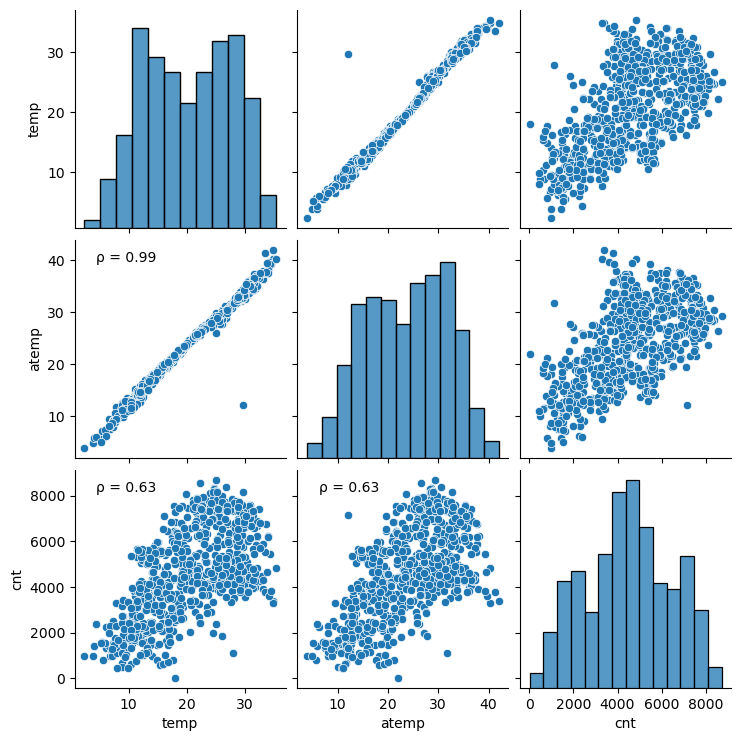

In [112]:
# Bivariate on all continous variables
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
plt.figure(figsize = (8, 4))
g = sns.pairplot(df[['temp', 'atemp', 'cnt']])
g.map_lower(corrfunc)
plt.show()

<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p> Assumption 1: <br>The Dependent variable and Independent variable must have a linear relationship
        <br> Here, We can observe that independent variables exhibit linear relationship with dependent variable (target variable)
</div>

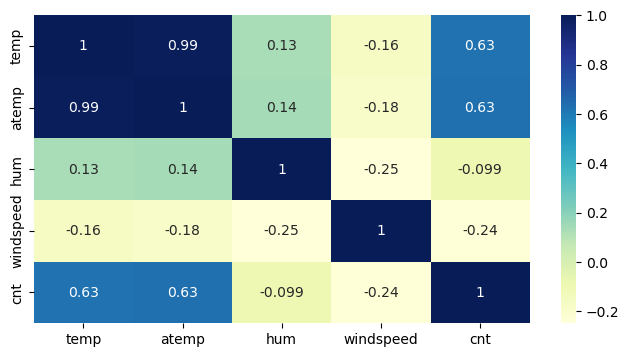

In [113]:
#Bivariate on all continous variables
plt.figure(figsize = (8, 4))
sns.heatmap(df[numeric_col].corr(), annot = True, cmap="YlGnBu")
plt.show()

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>1. 'atemp' and 'temp' are highly correlated. So we can consider one of these two variables for analysis.
                 <br/>2. 'atemp' & 'temp' have the positive and highest corelation with the target variable 'cnt'
                 <br/>3. 'hum' & 'windspeed' have the negative corelation with the target variable 'cnt'
    </p>
</div>

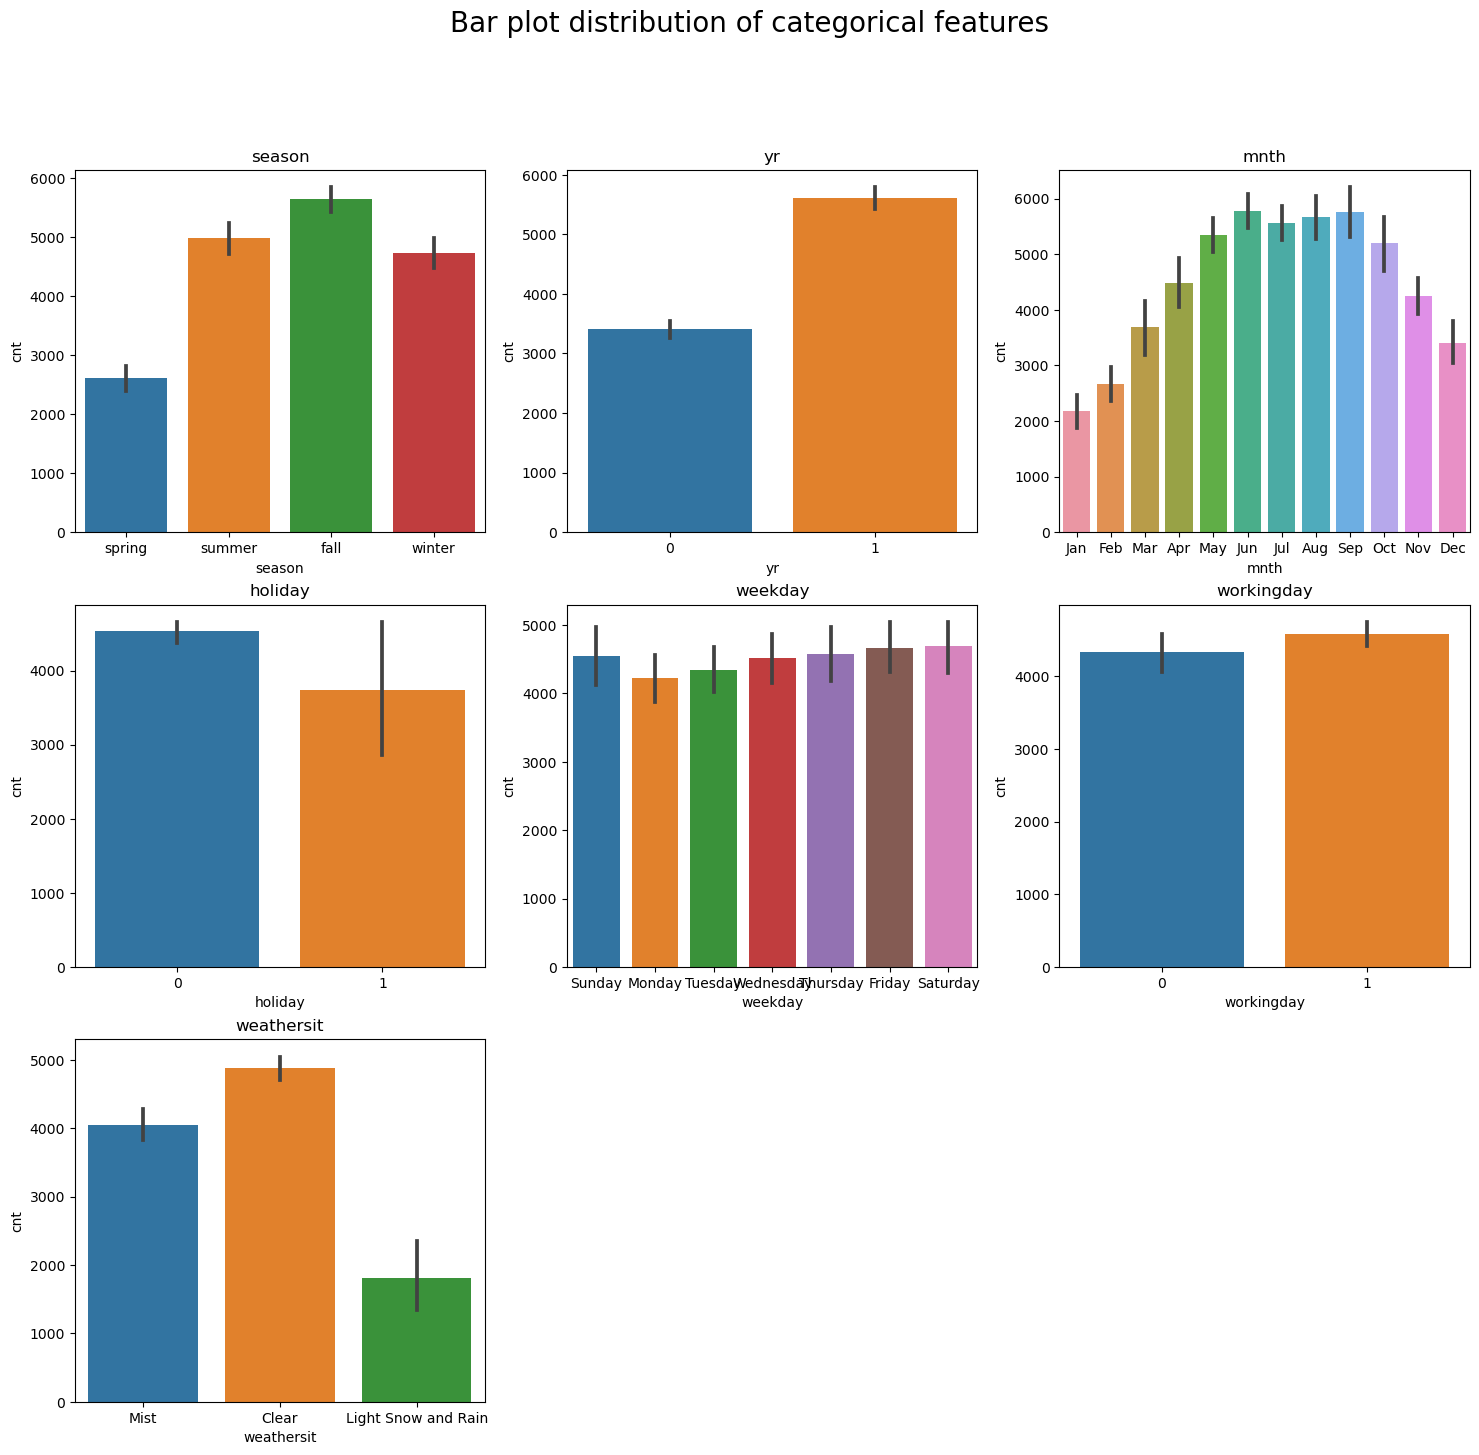

In [114]:
#Bivariate on all categorical variables with bar plot
plot_data('Bar plot distribution of categorical features', categorical_col, 'bar')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p>Insights:<br/><br/>
        <section> Season: 
            <ul> 
                <li>The demand for bikes is less in the month of spring when compared to other seasons.</li>
            </ul>
        </section>
        <section> Year: 
            <ul> 
                <li>The demand for bikes increased in the year 2019 than in 2018.</li>
            </ul>
        </section>
        <section> Month: 
            <ul> 
                <li>The demand for bikes is high from June to September and It is also observed that January has the lowest demand.</li>
            </ul>
        </section>
        <section> Holiday: 
            <ul> 
                <li>The demand for bikes is less in holidays in comparison to not being a holiday.</li>
            </ul>
        </section>
        <section> Weekdays: 
            <ul> 
                <li>The demand for bikes is almost similar throughout the weekdays.</li>
            </ul>
        </section>
        <section> Workingday: 
            <ul> 
                <li>There is no significant change in bike demand with working days and non working days.</li>
            </ul>
        </section>
        <section> Weathersit: 
            <ul> 
                <li>The bike demand is high when the weather is clear and Few clouds. But, the demand is less in case of Light snow and light rainfall. We do not have any data for Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog. So, we cannot reach any conclusion. Maybe the company is not operating on those days or there is no demand for bikes in that weathersit.</li>
            </ul>
        </section></p>
</div>

[Back To Top🔝](#content0)
## 6. Data Preperation <a name="content6"/>

### 6.1 Dummy variables<a name="content6_1"/>

In [115]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dummy_season'
dummy_season = pd.get_dummies(df['season'], drop_first=True)
dummy_season.value_counts()

spring  summer  winter
0       0       0         188
        1       0         184
1       0       0         180
0       0       1         178
dtype: int64

In [116]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'dummy_mnth'
dummy_mnth = pd.get_dummies(df['mnth'], drop_first=True)
dummy_mnth.value_counts()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    0    0    0    0    1    0      62
                                   1    0    0    0      62
                              1    0    0    0    0      62
                    1    0    0    0    0    0    0      62
               1    0    0    0    0    0    0    0      62
     1    0    0    0    0    0    0    0    0    0      62
1    0    0    0    0    0    0    0    0    0    0      62
0    0    0    0    0    0    0    0    0    0    0      60
                                                  1      60
                                        1    0    0      60
                         1    0    0    0    0    0      60
          1    0    0    0    0    0    0    0    0      56
dtype: int64

In [117]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'dummy_weekday'
dummy_weekday = pd.get_dummies(df['weekday'], drop_first=True)
dummy_weekday.value_counts()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         0       0         1        0            105
                  1       0         0        0            105
1       0         0       0         0        0            105
0       0         0       0         0        0            104
                                             1            104
        1         0       0         0        0            104
        0         0       1         0        0            103
dtype: int64

In [118]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'dummy_weathersit'
dummy_weathersit = pd.get_dummies(df['weathersit'], drop_first=True)
dummy_weathersit.value_counts()

Light Snow and Rain  Mist
0                    0       463
                     1       246
1                    0        21
dtype: int64

In [119]:
# Add the results to the original dataframe
df = pd.concat([df, dummy_season, dummy_mnth, dummy_weekday, dummy_weathersit], axis = 1)
# Drop 'season, mnth, weathersit' as we have created the dummies for it
df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


[Back To Top🔝](#content0)
### 6.2 Splitting the Data into Train and Test Sets<a name="content6_2"/>

In [120]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


[Back To Top🔝](#content0)
### 6.3 Feature Scaling<a name="content6_3"/>

We have observed that many variables have different unit in our analysis of EDA. 
<br/>Hence, We will use MinMax scaling to fix that issue.

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [122]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,1,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,0,0,0,0,1,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,0,0,0,0,1,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,1,0,0,0,0,1,0,0,0,1


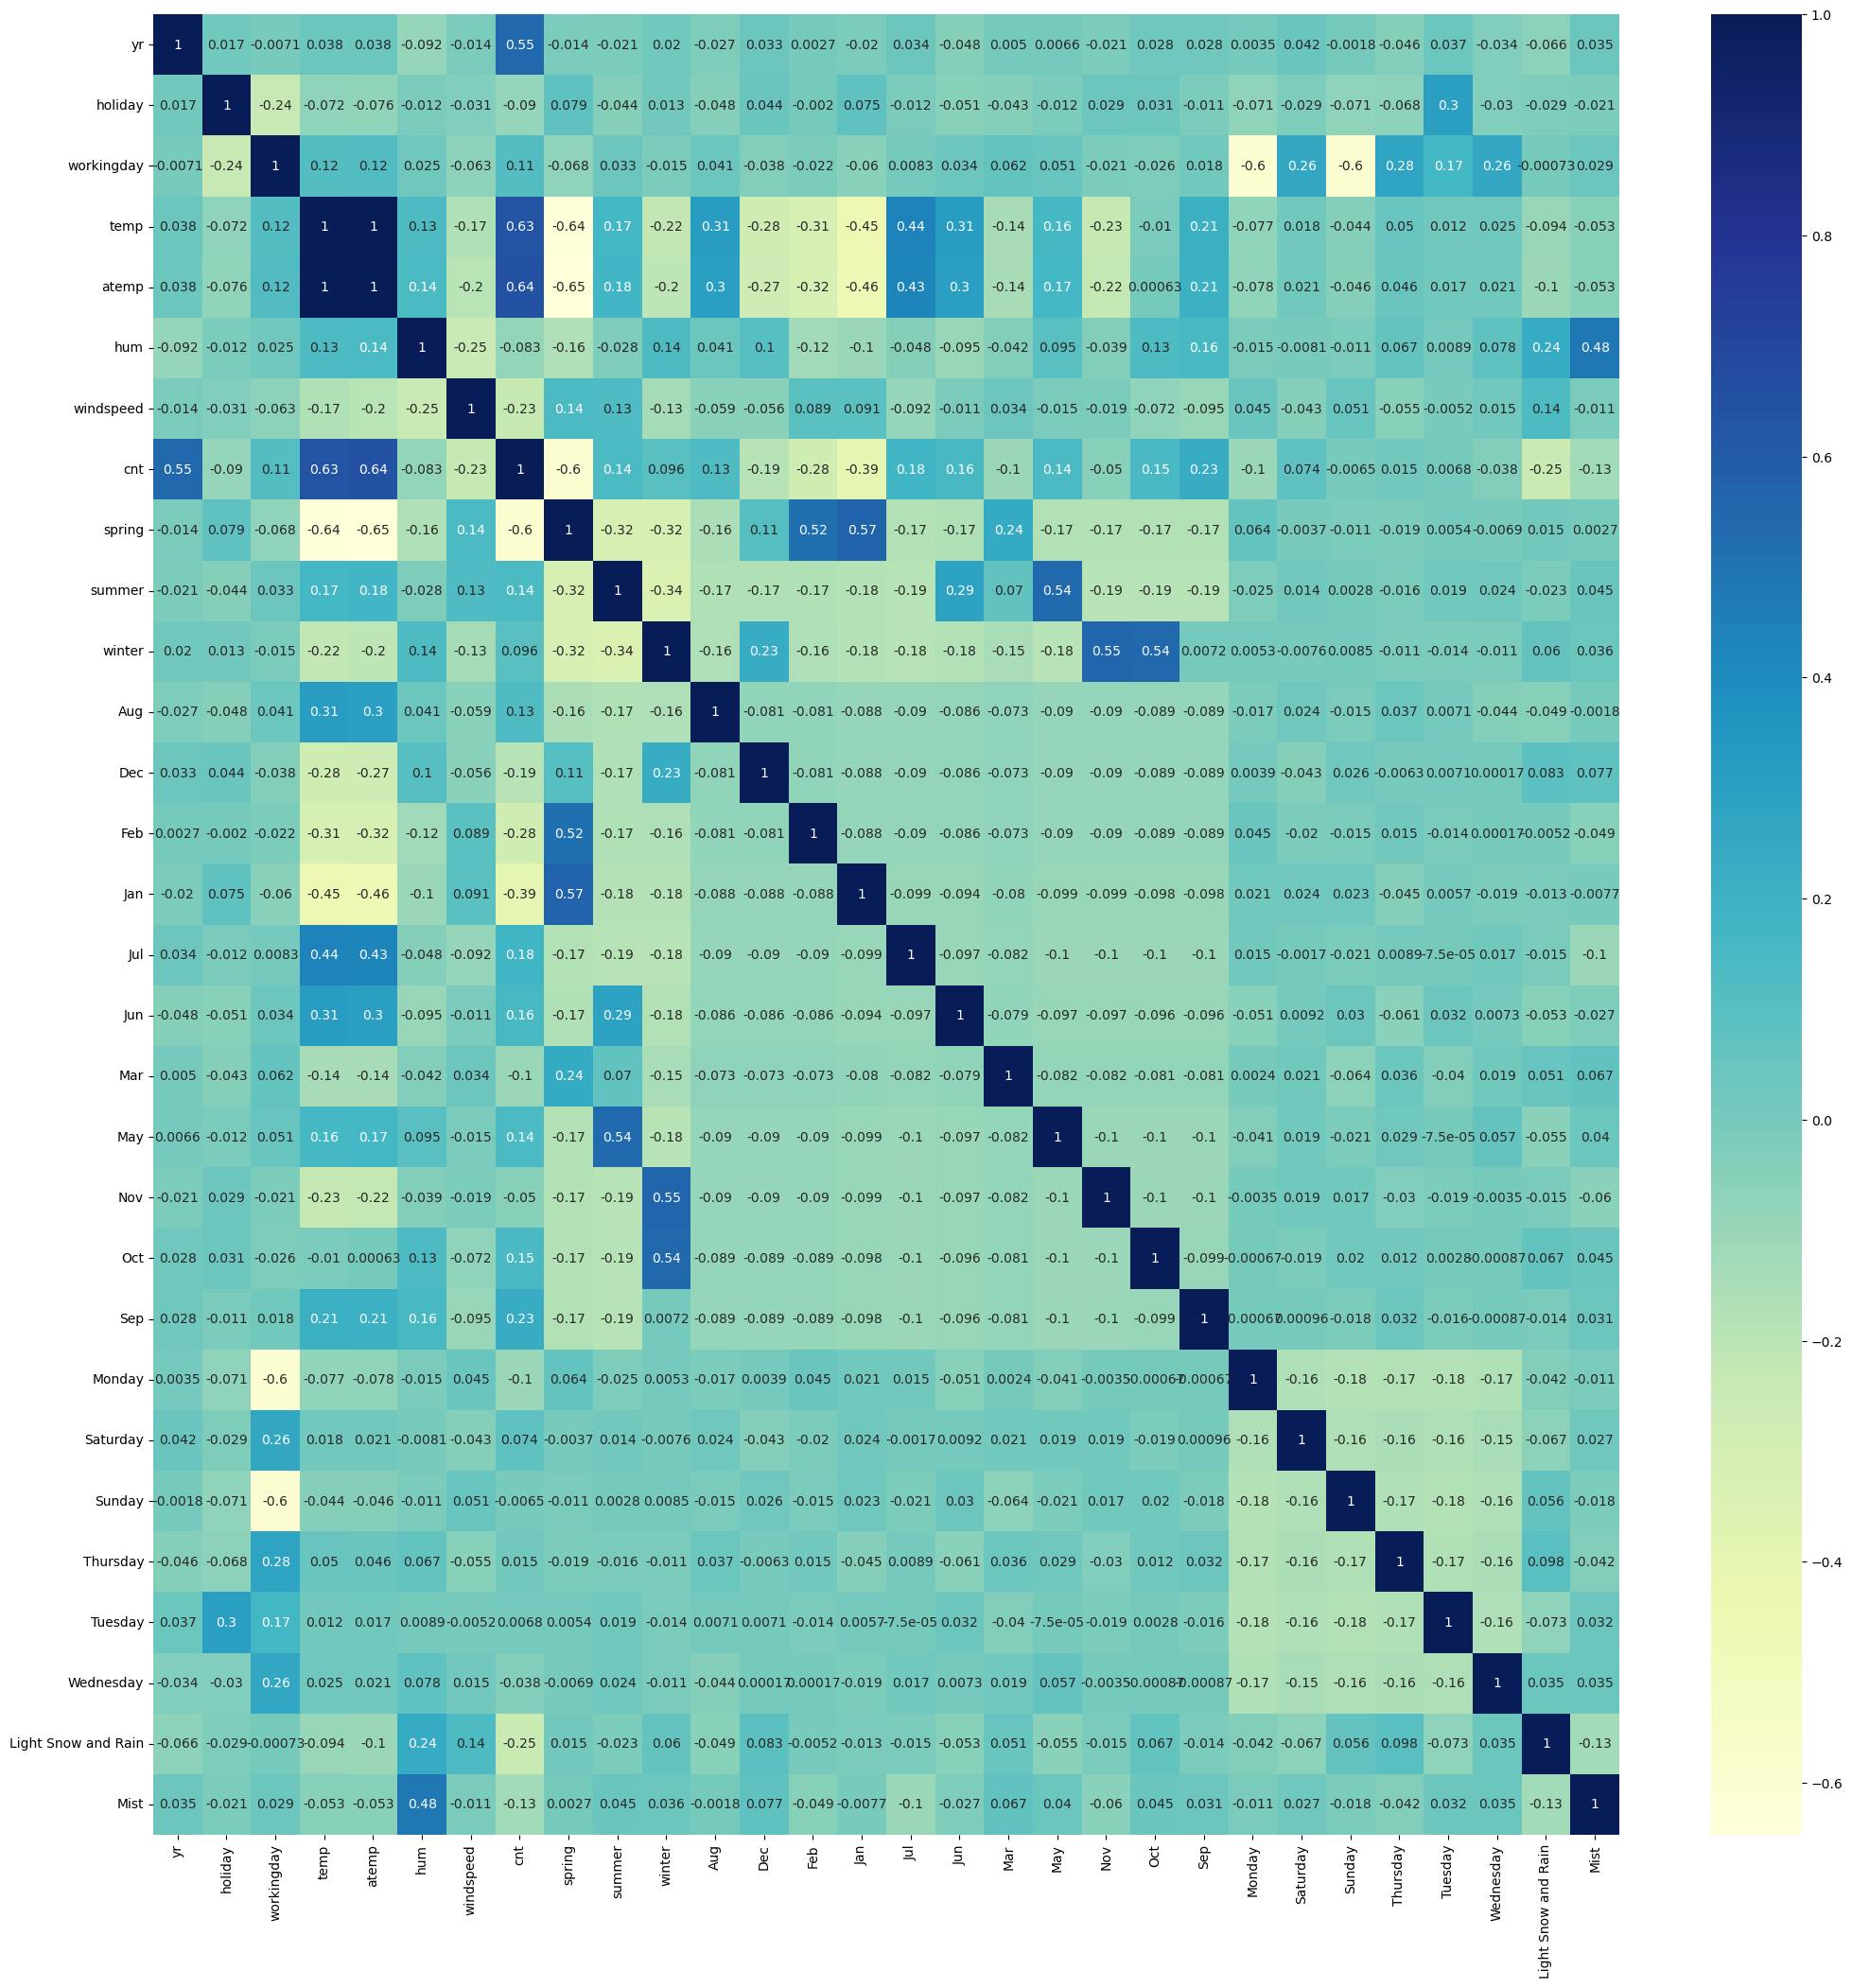

In [123]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

[Back To Top🔝](#content0)
### 6.4 Dividing into X and Y sets for the model building<a name="content6_4"/>

In [124]:
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test

[Back To Top🔝](#content0)
## 7. Data Modelling<a name="content7"/>

In [125]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Light Snow and Rain',
       'Mist'],
      dtype='object')

[Back To Top🔝](#content0)
### 7.1 Recusive feature elemination (RFE)<a name="content7_1"/>

In [126]:
# Running RFE with the output number of the variable equal to 10
X_train_lm = LinearRegression()
X_train_lm.fit(X_train, y_train)

# running RFE
rfe = RFE(X_train_lm, step = X_train.shape[1])
rfe = rfe.fit(X_train, y_train)

In [127]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', False, 2),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 2),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light Snow and Rain', True, 1),
 ('Mist', False, 2)]

In [128]:
ref_col = X_train.columns[rfe.support_]
ref_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Nov', 'Sep', 'Monday', 'Sunday',
       'Light Snow and Rain'],
      dtype='object')

[Back To Top🔝](#content0)
### 7.2 Building model  with Manual approach using statsmodel, for the detailed statistics<a name="content7_2"/>

In [129]:
def build_linear_model(X_train_, y_train_):
    # Adding a constant variable 
    X_train_ = sm.add_constant(X_train_)
    # Running the linear model
    lm = sm.OLS(y_train_,X_train_).fit() 
    print(lm.summary())
    return X_train_,lm
def calculate_VIF(X_train_):
    # Calculate the VIFs for the model
    vif = pd.DataFrame()
    X = X_train_
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [130]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[ref_col]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,winter,Nov,Sep,Monday,Sunday,Light Snow and Rain
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,1,1,0,0,0,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,1,0,0,0,0,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,1,0,0,0,0,0


In [131]:
# Build a linear model with X_train_rfe
X_train_rfe, lm = build_linear_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.65e-178
Time:                        19:43:54   Log-Likelihood:                 461.98
No. Observations:                 510   AIC:                            -896.0
Df Residuals:                     496   BIC:                            -836.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2901    

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>'temp' has highest p-value(0.683). So lets drop this column.</p>
</div>

In [132]:
X_train_new = X_train_rfe.drop(["temp"], axis = 1)
# Build a linear model with X_train_new
X_train_new, lm = build_linear_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     194.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.54e-179
Time:                        19:43:54   Log-Likelihood:                 461.90
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     497   BIC:                            -842.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2909    

In [133]:
# Calculate the VIFs for this model
calculate_VIF(X_train_new)

,Features,VIF
2,holiday,inf
3,workingday,inf
11,Monday,inf
12,Sunday,inf
4,atemp,2.87
7,spring,2.84
8,winter,2.04
9,Nov,1.54
5,hum,1.23
6,windspeed,1.18


<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>We can observe that the p-value of 'holiday' is 0.354 & the VIF value is infinity. So lets drop this column.</p>
</div>

In [134]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)
# Build a linear model with X_train_new
X_train_new, lm = build_linear_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     194.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.54e-179
Time:                        19:43:54   Log-Likelihood:                 461.90
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     497   BIC:                            -842.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3120    

In [135]:
# Calculate the VIFs for this model
calculate_VIF(X_train_new)

,Features,VIF
0,const,103.86
2,workingday,8.51
10,Monday,5.60
11,Sunday,5.59
3,atemp,2.87
6,spring,2.84
7,winter,2.04
8,Nov,1.54
4,hum,1.23
5,windspeed,1.18


<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>We can observe that the p-value of 'Monday' is 0.160 & the VIF value is 5.60. So lets drop this column.</p>
</div>

In [136]:
X_train_new = X_train_new.drop(["Monday"], axis = 1)
# Build a linear model with X_train_new
X_train_new, lm = build_linear_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          6.34e-180
Time:                        19:43:55   Log-Likelihood:                 460.89
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     498   BIC:                            -847.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3459    

In [137]:
# Calculate the VIFs for this model
vif = calculate_VIF(X_train_new)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:
        <br/> 1. We can see that the p-values of all variables are less than 0.05 and the VIF values for all the varibles are less than 5.
        <br/> 2. We can see that the adjusted R square is 0.820 which implies a good score
        <br/> 3. We can see that the F-Statistic is 212.1 which implies the overall model fit is also good
        <br/><b> Hence, we got the optimised model and we can proceed to the next step</b>
    </p>
</div>

In [138]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          6.34e-180
Time:                        19:43:55   Log-Likelihood:                 460.89
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     498   BIC:                            -847.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3459      0.038      9.173      0.000       0.272       0.420
yr                      0.2311      0.009     26.037      0.000       0.214       0.249
workingday              0.0460      0.012      3.912      0.000       0.023       0.069
atemp                   0.4670      0.035     13.355      0.000       0.398       0.536
hum                    -0.2804      0.034     -8.245      0.000      -0.347      -0.214
windspeed              -0.1207      0.026     -4.702      0.000      -0.171      -0.070
spring                 -0.1508      0.018     -8.606      0.000      -0.185      -0.116
winter                  0.0782      0.014      5.408      0.000       0.050       0.107
Nov                    -0.0592      0.019     -3.139      0.002      -0.096      -0.022
Sep                     0.0744      0.016      4.677      0.000       0.043       0.106
Sunday                  0.0512      0.015      3.323      0.001       0.021       0.081
Light Snow and Rain    -0.1801      0.028     -6.497      0.000      -0.235      -0.126
==============================================================================
Omnibus:                       75.290   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.843
Skew:                          -0.855   Prob(JB):                     1.58e-31
Kurtosis:                       4.937   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p> Assumption 2: <br>No Autocorrelation in residuals.
        <br> Here, We can observe that the value of Durbin-Watson is 2.016 which states that there is no autocorrelation.
</div>

In [139]:
vif

,Features,VIF
0,const,73.70
3,atemp,2.87
6,spring,2.83
7,winter,2.04
2,workingday,1.59
10,Sunday,1.58
8,Nov,1.54
4,hum,1.23
5,windspeed,1.17
11,Light Snow and Rain,1.14


<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p> Assumption 4: <br>No Perfect Multicollinearity.
        <br> Here, We can observe that the VIF values of all variables are < 3 which clearly implies that our assumption is correct.</p>
</div>

[Back To Top🔝](#content0)
### 7.3 Residual Analysis of the train data<a name="content7_3"/>
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [140]:
y_train_new = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

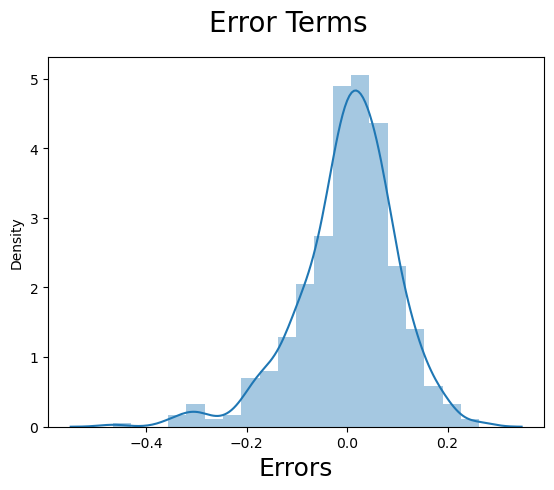

In [141]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_new), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)     

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:
        <br/>The above distribution plot of error term shows that it has normal distribution with mean at Zero
    </p>
</div>

<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p> Assumption 5: <br>Residuals must be normally distributed with centre as 0.
        <br> Here, We can clearly observe that residuals follow normal distribution with mean at 0</p>
</div>

Text(0, 0.5, 'residuals')

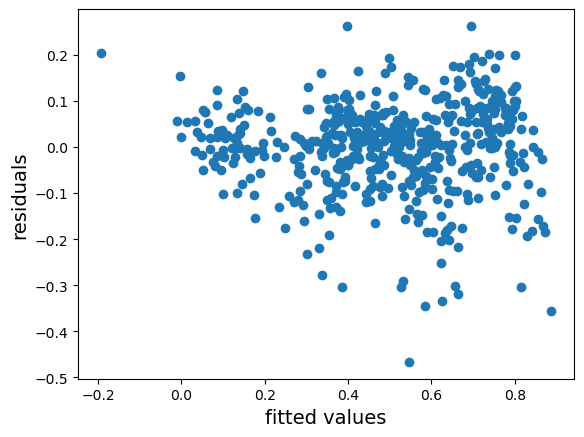

In [142]:
# Plot the scatter plot with residuals and fitted values
fig = plt.figure()
y_residual = y_train - y_train_new
plt.scatter(y_train_new, y_residual)
# Plot heading 
plt.xlabel('fitted values', fontsize = 14)  
plt.ylabel('residuals', fontsize = 14)   

<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p> Assumption 3: <br>No Heteroskedasticity
        <br> Here, We can clearly observe that the plot is not in a funnel shape. Hence, No Heteroskedasticity</p>
</div>

[Back To Top🔝](#content0)
## 8. Model Prediction & Evaluation<a name="content8"/>

### Making Predictions

In [143]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Nov', 'Sep', 'Sunday', 'Light Snow and Rain'],
      dtype='object')

In [144]:
# Now let's use our model to make predictions.

model_col = X_train_new.columns
model_col = model_col.drop("const")
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[model_col]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [145]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

In [146]:
lm.params

const                  0.345871
yr                     0.231125
workingday             0.046005
atemp                  0.466997
hum                   -0.280397
windspeed             -0.120676
spring                -0.150850
winter                 0.078235
Nov                   -0.059203
Sep                    0.074416
Sunday                 0.051197
Light Snow and Rain   -0.180125
dtype: float64

In [147]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
# Adj. R-Squared for test dataset
N= len(X_test_new)          # sample size
p = len(model_col)          # Number of independent variable
r2_adj = (1-((1-r_squared)*(N-1)/(N-p-1)))
print('Mean_Squared_Error :' ,mse)
print('R_squared_value :',r_squared)
print('Adj. R-Squared_value: ', r2_adj)

Mean_Squared_Error : 0.009664132241463508
R_squared_value : 0.8213106493632392
Adj. R-Squared_value:  0.8118150800057302


Text(0, 0.5, 'y_pred')

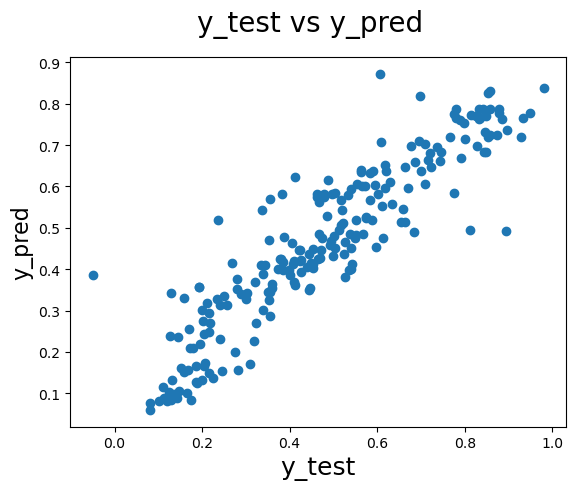

In [148]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)   # X-label
plt.ylabel('y_pred', fontsize=16)   # Y-label

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:
        <br/>We can conclude from above graph that the model fit is good and it has descent predictive power.
    </p>
</div>

[Back To Top🔝](#content0)
## 9. Conclusion<a name="content9"/>

In [149]:
def getParamCoef(i):
    return "("+str(round(lm.params[i],3))+")"
def getFormula():
    eq = "cnt = "
    for i in range(1, X_train_new.columns.size):
        eq = eq + getParamCoef(i) + " * "+ X_train_new.columns[i]+ " + "
    eq = eq+getParamCoef(0)
    return eq
print("We can see that the equation of our best fitted line is: \n"+getFormula())

We can see that the equation of our best fitted line is: 
cnt = (0.231) * yr + (0.046) * workingday + (0.467) * atemp + (-0.28) * hum + (-0.121) * windspeed + (-0.151) * spring + (0.078) * winter + (-0.059) * Nov + (0.074) * Sep + (0.051) * Sunday + (-0.18) * Light Snow and Rain + (0.346)


<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p>
        <br>1. We can observe that the values of R-Sqaured and adj R-Sqaured of both train and test dataset are more than 80% of bike demand.
        <br>2. The coeffiencients of the variables explains the factors effecting the bike demand.
        <br>3. We have also proved all the assumptions taken on linear regression.
        <br>4. The top features that contributes significantly towards bike demands w.r.t model are:
    <ul>
        <li><b>Feel Like Temperature</b></li>
        <li><b>Humidity</b></li>
        <li><b>Year</b></li>
        <li><b>Weathersit : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</b></li>
    </ul>
   
<br/>So it is recommended to consider these variables while planning to achieve maximum bikes demand.
    </p>
</div>
